# EAEE9305 Energy Prediction
### Uni: zx2407  Name: ZIHAO XIAO

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
data1 = pd.read_csv('2010-2011 .csv', usecols=[0, 1, 2, 3, 4, 5, 6, 7])
data2 = pd.read_csv('2011-2012 .csv', usecols=[0, 1, 2, 3, 4, 5, 6, 7])
data3 = pd.read_csv('2012-2013.csv', usecols=[0, 1, 2, 3, 4, 5, 6, 7])

### Data Prepocessing

In [4]:
# concatenate the three DataFrames vertically
merged_data = pd.concat([data1, data2, data3])

# save the merged data to a new CSV file
merged_data.to_csv('merged_file.csv', index=False)

In [5]:
num_rows = merged_data.shape[0]
print('Number of rows:', num_rows)
print(merged_data.head())

Number of rows: 32725
   User Number       Date  Energy Production  Temperature (°F)  Humidity (%)  \
0          1.0  1/07/2010             10.020              51.5          59.6   
1          1.0  2/07/2010              3.496              51.3          65.6   
2          1.0  3/07/2010             11.658              52.3          62.0   
3          1.0  4/07/2010             11.134              54.4          67.4   
4          1.0  5/07/2010              3.423              52.3          83.5   

   Wind Speed (mph)\t  Pressure (in)  Precipitation (in)  
0                 8.6           30.2                 0.0  
1                 9.5           30.2                 0.0  
2                15.8           30.3                 0.0  
3                11.5           30.3                 0.0  
4                 7.2           30.2                 0.0  


In [6]:
# convert the Date column to datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'], format='%d/%m/%Y')

# check the data type of the Date column
print(merged_data['Date'].dtype)
print(merged_data.head())

num_rows = merged_data.shape[0]
print('Number of rows:', num_rows)

datetime64[ns]
   User Number       Date  Energy Production  Temperature (°F)  Humidity (%)  \
0          1.0 2010-07-01             10.020              51.5          59.6   
1          1.0 2010-07-02              3.496              51.3          65.6   
2          1.0 2010-07-03             11.658              52.3          62.0   
3          1.0 2010-07-04             11.134              54.4          67.4   
4          1.0 2010-07-05              3.423              52.3          83.5   

   Wind Speed (mph)\t  Pressure (in)  Precipitation (in)  
0                 8.6           30.2                 0.0  
1                 9.5           30.2                 0.0  
2                15.8           30.3                 0.0  
3                11.5           30.3                 0.0  
4                 7.2           30.2                 0.0  
Number of rows: 32725


In [7]:
# Remove duplicate rows for each user separately
user_number_column = 'User Number'
unique_users = merged_data[user_number_column].unique()
cleaned_data = pd.DataFrame()

for user in unique_users:
    user_data = merged_data[merged_data[user_number_column] == user]
    user_data = user_data.drop_duplicates(subset=['Date'])
    cleaned_data = cleaned_data.append(user_data)

merged_data = cleaned_data
print(merged_data.head())
num_rows = merged_data.shape[0]
print('Number of rows:', num_rows)

   User Number       Date  Energy Production  Temperature (°F)  Humidity (%)  \
0          1.0 2010-07-01             10.020              51.5          59.6   
1          1.0 2010-07-02              3.496              51.3          65.6   
2          1.0 2010-07-03             11.658              52.3          62.0   
3          1.0 2010-07-04             11.134              54.4          67.4   
4          1.0 2010-07-05              3.423              52.3          83.5   

   Wind Speed (mph)\t  Pressure (in)  Precipitation (in)  
0                 8.6           30.2                 0.0  
1                 9.5           30.2                 0.0  
2                15.8           30.3                 0.0  
3                11.5           30.3                 0.0  
4                 7.2           30.2                 0.0  
Number of rows: 32675


C:\Users\zanex\AppData\Local\Temp\ipykernel_14212\1072288778.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cleaned_data = cleaned_data.append(user_data)
C:\Users\zanex\AppData\Local\Temp\ipykernel_14212\1072288778.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cleaned_data = cleaned_data.append(user_data)
C:\Users\zanex\AppData\Local\Temp\ipykernel_14212\1072288778.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cleaned_data = cleaned_data.append(user_data)
C:\Users\zanex\AppData\Local\Temp\ipykernel_14212\1072288778.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cleaned_data = cleaned_data.append(user_data)
C:\Users

In [8]:
# select only the rows where Energy Production is not equal to 0
merged_data = merged_data[merged_data['Energy Production'] != 0]
merged_data =  merged_data.dropna()

# Remove duplicate rows based on 'Date' and 'User Number' columns
merged_data = merged_data.drop_duplicates(subset=['User Number', 'Date'])

num_rows = merged_data.shape[0]
print('Number of rows:', num_rows)
merged_data.to_csv('cleaned_file.csv', index=False)

Number of rows: 32464


In [9]:
from sklearn.preprocessing import LabelEncoder
# Label encode the 'User Number' column
le = LabelEncoder()
merged_data['user_number'] = le.fit_transform(merged_data['User Number'])

# save the encoded data to a new CSV file
merged_data.to_csv('encode_file.csv', index=False)

print(merged_data.head())
num_rows = merged_data.shape[0]
print('Number of rows:', num_rows)

   User Number       Date  Energy Production  Temperature (°F)  Humidity (%)  \
0          1.0 2010-07-01             10.020              51.5          59.6   
1          1.0 2010-07-02              3.496              51.3          65.6   
2          1.0 2010-07-03             11.658              52.3          62.0   
3          1.0 2010-07-04             11.134              54.4          67.4   
4          1.0 2010-07-05              3.423              52.3          83.5   

   Wind Speed (mph)\t  Pressure (in)  Precipitation (in)  user_number  
0                 8.6           30.2                 0.0            0  
1                 9.5           30.2                 0.0            0  
2                15.8           30.3                 0.0            0  
3                11.5           30.3                 0.0            0  
4                 7.2           30.2                 0.0            0  
Number of rows: 32464


In [10]:
# generate region data
daily_production = merged_data.groupby('Date')['Energy Production'].sum().reset_index()
daily_production = daily_production.rename(columns={'Energy Production': 'Region Production'})
daily_production = pd.merge(merged_data, daily_production, on='Date', how='left')
daily_production = daily_production.drop(columns=['user_number'])
daily_production = daily_production.drop(columns=['User Number'])
daily_production = daily_production.drop(columns=['Energy Production'])
daily_production = daily_production.drop(columns=['Precipitation (in)'])

daily_production_1 = daily_production.head(1092)

# save the region data to a new CSV file
daily_production_1.to_csv('region_data.csv', index=False)
print(daily_production.head())

        Date  Temperature (°F)  Humidity (%)  Wind Speed (mph)\t  \
0 2010-07-01              51.5          59.6                 8.6   
1 2010-07-02              51.3          65.6                 9.5   
2 2010-07-03              52.3          62.0                15.8   
3 2010-07-04              54.4          67.4                11.5   
4 2010-07-05              52.3          83.5                 7.2   

   Pressure (in)  Region Production  
0           30.2            144.584  
1           30.2             41.273  
2           30.3            162.605  
3           30.3            146.571  
4           30.2             39.345  


## Region data

In [97]:
# Select the relevant columns
region_data = daily_production_1[['Date', 'Region Production', 'Temperature (°F)', 'Humidity (%)', 'Wind Speed (mph)\t', 'Pressure (in)']]
region_data.columns = ['ds', 'y', 'temp', 'humidity', 'wind_speed', 'pressure']
X_region_data = region_data
print(region_data.head())

# 65:35 ratio for splitting the data, with the earlier dates being used for training and the later dates for testing.
train_ratio = 0.65
split_index = int(train_ratio * len(region_data))
region_train_data = region_data[:split_index]
region_test_data = region_data[split_index:]

print(region_data.shape[0])

          ds        y  temp  humidity  wind_speed  pressure
0 2010-07-01  144.584  51.5      59.6         8.6      30.2
1 2010-07-02   41.273  51.3      65.6         9.5      30.2
2 2010-07-03  162.605  52.3      62.0        15.8      30.3
3 2010-07-04  146.571  54.4      67.4        11.5      30.3
4 2010-07-05   39.345  52.3      83.5         7.2      30.2
1092


In [80]:
import matplotlib.pyplot as plt

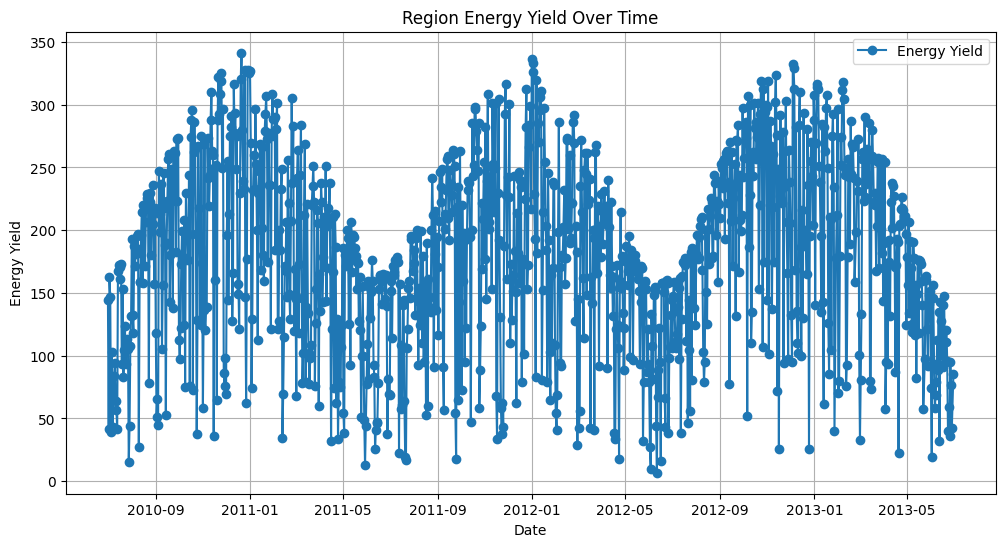

In [94]:
# Set the 'ds' column as the index
region_data.set_index('ds', inplace=True)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(region_data.index, region_data['y'], marker='o', linestyle='-', label='Energy Yield')

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Energy Yield")
plt.title("Region Energy Yield Over Time")
plt.legend()
plt.grid()

# Display the plot
plt.show()

In [95]:
#Feature Importance Map
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()

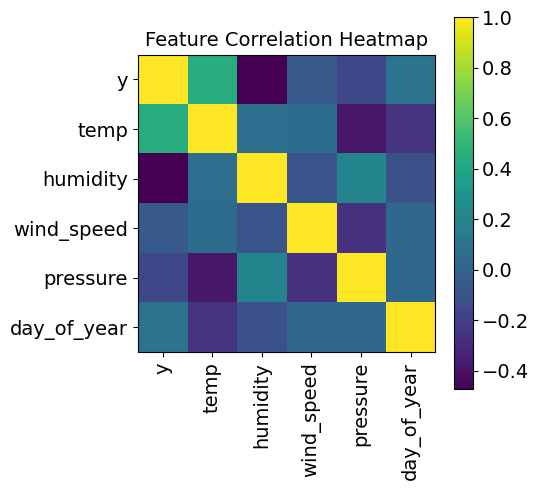

In [96]:
show_heatmap(region_data)

<br/>

<br/>

<br/>

## LSTM Model - for region data (Only Time Series)

In [573]:
print(region_train_data.shape[0])

print(region_train_data.head())


print(region_test_data.shape[0])

print(region_test_data.head())

709
          ds        y  temp  humidity  wind_speed  pressure  day_of_year
0 2010-07-01  144.584  51.5      59.6         8.6      30.2          182
1 2010-07-02   41.273  51.3      65.6         9.5      30.2          183
2 2010-07-03  162.605  52.3      62.0        15.8      30.3          184
3 2010-07-04  146.571  54.4      67.4        11.5      30.3          185
4 2010-07-05   39.345  52.3      83.5         7.2      30.2          186
383
            ds        y  temp  humidity  wind_speed  pressure  day_of_year
709 2012-06-09  151.862  52.7      67.6         6.9      30.3          161
710 2012-06-10   44.392  53.6      88.1         9.1      30.2          162
711 2012-06-11    6.778  56.6      87.5        15.6      30.1          163
712 2012-06-12   88.353  58.9      82.4        16.4      30.1          164
713 2012-06-13   67.363  56.8      90.5        10.9      30.1          165


In [574]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout

In [575]:
# Add a new column representing the day of the year
region_train_data['day_of_year'] = region_train_data['ds'].dt.dayofyear
region_test_data['day_of_year'] = region_test_data['ds'].dt.dayofyear

C:\Users\zanex\AppData\Local\Temp\ipykernel_14212\749238515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_train_data['day_of_year'] = region_train_data['ds'].dt.dayofyear
C:\Users\zanex\AppData\Local\Temp\ipykernel_14212\749238515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_test_data['day_of_year'] = region_test_data['ds'].dt.dayofyear


In [576]:
# Scale input features

scaler = MinMaxScaler()
input_features = ['day_of_year']

In [577]:
X_train = scaler.fit_transform(region_train_data[input_features])
X_test = scaler.transform(region_test_data[input_features])

In [578]:
y_train = region_train_data['y'].values
y_test = region_test_data['y'].values

In [579]:
print(len(X_train))
print(len(X_test))

print(len(y_train))
print(len(y_test))

709
383
709
383


In [595]:
#create a function to reshape the data into a format suitable for the LSTM model:

def reshape_data(y_data, lookback):
    X, Y = [], []
    for i in range(len(y_data) - lookback):
        X.append(y_data[i:(i + lookback)])
        Y.append(y_data[i + lookback])
    return np.array(X), np.array(Y)

In [653]:
lookback = 5
# The number of previous time steps to use as input features

X_train_reshaped, y_train_reshaped = reshape_data( y_train, lookback)
X_test_reshaped, y_test_reshaped = reshape_data(y_test, lookback)

X_train_reshaped_1 = X_train_reshaped.reshape((X_train_reshaped.shape[0], 5, 1))

In [654]:
print(len(X_train_reshaped))
print(len(y_train_reshaped))

print(len(X_test_reshaped))
print(len(y_test_reshaped))

704
704
378
378


In [655]:
#build the LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape= (X_train_reshaped_1.shape[1],X_train_reshaped_1.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse')
    return model

model = create_lstm_model(X_train_reshaped_1.shape[1:])

In [656]:
# Train the model
model.fit(X_train_reshaped, y_train_reshaped, epochs=50, batch_size=128, validation_split=0.1)

# Evaluate the model
model.evaluate(X_test_reshaped, y_test_reshaped)

Epoch 1/50
5/5 [==============================] - 2s 99ms/step - loss: 45531.0586 - val_loss: 25057.5957
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 36017.4414 - val_loss: 20832.8359
Epoch 3/50
5/5 [==============================] - 0s 12ms/step - loss: 31959.9629 - val_loss: 19016.9434
Epoch 4/50
5/5 [==============================] - 0s 12ms/step - loss: 27488.7480 - val_loss: 15471.6230
Epoch 5/50
5/5 [==============================] - 0s 12ms/step - loss: 19735.9512 - val_loss: 5274.4204
Epoch 6/50
5/5 [==============================] - 0s 12ms/step - loss: 12409.5762 - val_loss: 6326.7129
Epoch 7/50
5/5 [==============================] - 0s 13ms/step - loss: 12517.2559 - val_loss: 5656.2339
Epoch 8/50
5/5 [==============================] - 0s 11ms/step - loss: 10731.6299 - val_loss: 3583.4065
Epoch 9/50
5/5 [==============================] - 0s 13ms/step - loss: 9277.7793 - val_loss: 3218.7791
Epoch 10/50
5/5 [==============================] - 0s 13ms/st

4504.64794921875

In [657]:
import matplotlib.pyplot as plt


In [658]:
y_pred = model.predict(X_test_reshaped)

12/12 [==============================] - 0s 2ms/step


In [659]:
y_pred_reshaped = np.squeeze(y_pred)

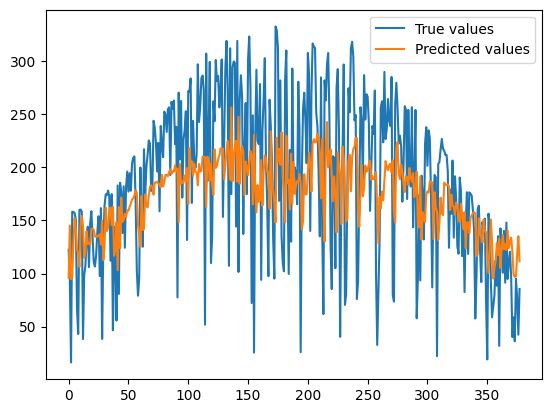

In [660]:
# assume y_true is a numpy array of true values and y_pred is a numpy array of predicted values
plt.plot(y_test_reshaped, label='True values')
plt.plot(y_pred_reshaped, label='Predicted values')
plt.legend()
plt.show()

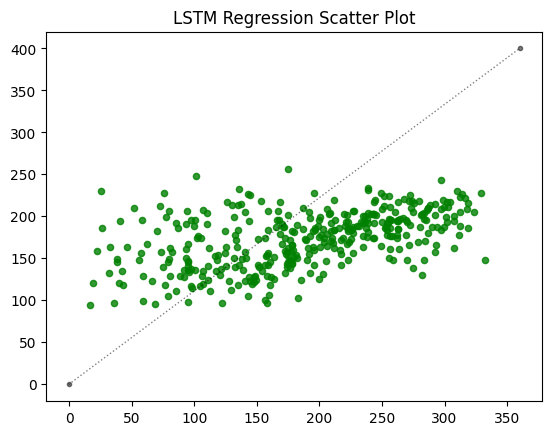

In [661]:
### validation scatter plot(RandomForest) ###
x1 = [-0.5, 360]
y1 = [-0.5, 400] 

plt.figure()
plt.plot(x1, y1, c='0', linewidth=1, linestyle=':', marker='.', alpha=0.5)
plt.scatter(y_test_reshaped, y_pred_reshaped, s=20, c='g',  marker = 'o', alpha=0.8 )
plt.title('LSTM Regression Scatter Plot')
plt.show()

In [662]:
from sklearn.metrics import mean_absolute_error, r2_score


In [663]:
mae = mean_absolute_error(y_test_reshaped, y_pred_reshaped)
r2 = r2_score(y_test_reshaped, y_pred_reshaped)

print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Absolute Error: 55.48555461274001
R-squared: 0.20459863130771805


In [664]:

mae = mean_absolute_error(y_test_reshaped, y_pred_reshaped)
rLSTM_NoWeather = r2_score(y_test_reshaped,y_pred_reshaped)
ResidualSquare =(y_test_reshaped - y_pred_reshaped) ** 2
RSSLSTM_NoWeather = sum(ResidualSquare)
MSELSTM_NoWeather = np.mean(ResidualSquare)
num_regress = len(y_pred_reshaped)


print(f'n = {num_regress}')
print(f'Mean squared error = {MSELSTM_NoWeather}')
print(f'Residual Sum of Squares  = {RSSLSTM_NoWeather}')
print(f'R^2 = {rLSTM_NoWeather}')

n = 378
Mean squared error = 4504.647965209407
Residual Sum of Squares  = 1702756.930849157
R^2 = 0.20459863130771805


### Change the parameter (increase learning rate)

In [744]:
#build the LSTM model

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape= (X_train_reshaped_1.shape[1],X_train_reshaped_1.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer=optimizer, loss='mse')
    return model

model = create_lstm_model(X_train_reshaped_1.shape[1:])

In [745]:
# Train the model
model.fit(X_train_reshaped, y_train_reshaped, epochs=50, batch_size=128, validation_split=0.1)

# Evaluate the model
model.evaluate(X_test_reshaped, y_test_reshaped)

Epoch 1/50
5/5 [==============================] - 2s 111ms/step - loss: 29355.0703 - val_loss: 104446.7734
Epoch 2/50
5/5 [==============================] - 0s 15ms/step - loss: 54434.1094 - val_loss: 14862.3379
Epoch 3/50
5/5 [==============================] - 0s 14ms/step - loss: 24803.6406 - val_loss: 14497.3408
Epoch 4/50
5/5 [==============================] - 0s 15ms/step - loss: 20049.6562 - val_loss: 5093.6885
Epoch 5/50
5/5 [==============================] - 0s 14ms/step - loss: 11206.4277 - val_loss: 5051.1523
Epoch 6/50
5/5 [==============================] - 0s 12ms/step - loss: 10678.1982 - val_loss: 3960.9102
Epoch 7/50
5/5 [==============================] - 0s 15ms/step - loss: 9695.5723 - val_loss: 4090.7998
Epoch 8/50
5/5 [==============================] - 0s 16ms/step - loss: 8323.2061 - val_loss: 2651.0955
Epoch 9/50
5/5 [==============================] - 0s 15ms/step - loss: 8483.0391 - val_loss: 2769.7310
Epoch 10/50
5/5 [==============================] - 0s 20ms/ste

4663.103515625

In [746]:
y_pred = model.predict(X_test_reshaped)

12/12 [==============================] - 0s 2ms/step


In [747]:
y_pred_reshaped = np.squeeze(y_pred)

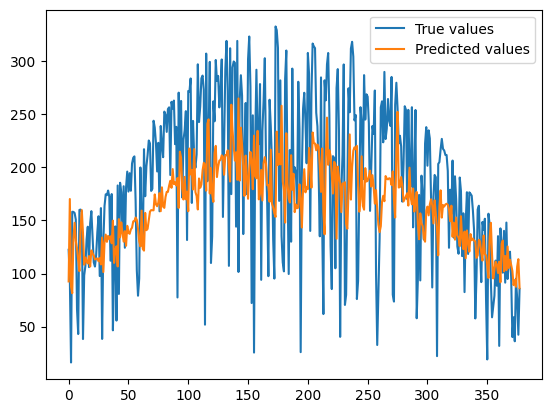

In [748]:
# assume y_true is a numpy array of true values and y_pred is a numpy array of predicted values
plt.plot(y_test_reshaped, label='True values')
plt.plot(y_pred_reshaped, label='Predicted values')
plt.legend()
plt.show()

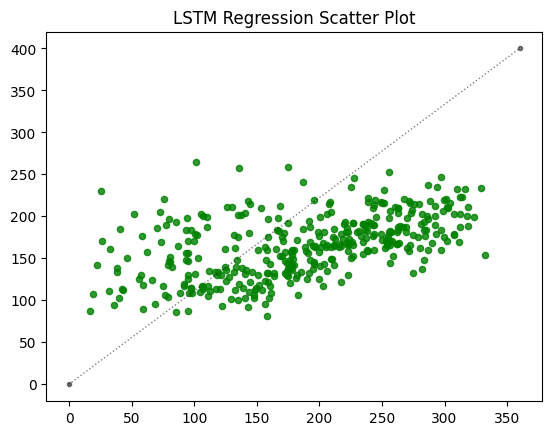

In [749]:
### validation scatter plot(RandomForest) ###
x1 = [-0.5, 360]
y1 = [-0.5, 400] 

plt.figure()
plt.plot(x1, y1, c='0', linewidth=1, linestyle=':', marker='.', alpha=0.5)
plt.scatter(y_test_reshaped, y_pred_reshaped, s=20, c='g',  marker = 'o', alpha=0.8 )
plt.title('LSTM Regression Scatter Plot')
plt.show()

### Change the parameter (decrease learning rate)

In [756]:
#build the LSTM model

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape= (X_train_reshaped_1.shape[1],X_train_reshaped_1.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mse')
    return model

model = create_lstm_model(X_train_reshaped_1.shape[1:])

In [757]:
# Train the model
model.fit(X_train_reshaped, y_train_reshaped, epochs=50, batch_size=128, validation_split=0.1)

# Evaluate the model
model.evaluate(X_test_reshaped, y_test_reshaped)

Epoch 1/50
5/5 [==============================] - 2s 97ms/step - loss: 40734.0547 - val_loss: 25634.5156
Epoch 2/50
5/5 [==============================] - 0s 14ms/step - loss: 40373.8555 - val_loss: 25396.7480
Epoch 3/50
5/5 [==============================] - 0s 12ms/step - loss: 39648.2109 - val_loss: 25185.9863
Epoch 4/50
5/5 [==============================] - 0s 15ms/step - loss: 39553.1133 - val_loss: 24988.1074
Epoch 5/50
5/5 [==============================] - 0s 12ms/step - loss: 38972.7656 - val_loss: 24779.3574
Epoch 6/50
5/5 [==============================] - 0s 13ms/step - loss: 38362.7539 - val_loss: 24543.5195
Epoch 7/50
5/5 [==============================] - 0s 15ms/step - loss: 37855.1328 - val_loss: 24255.8906
Epoch 8/50
5/5 [==============================] - 0s 14ms/step - loss: 37194.9570 - val_loss: 23883.2988
Epoch 9/50
5/5 [==============================] - 0s 16ms/step - loss: 37003.3594 - val_loss: 23443.7578
Epoch 10/50
5/5 [==============================] - 0s 1

4853.60498046875

In [758]:
y_pred = model.predict(X_test_reshaped)

12/12 [==============================] - 0s 3ms/step


In [759]:
y_pred_reshaped = np.squeeze(y_pred)

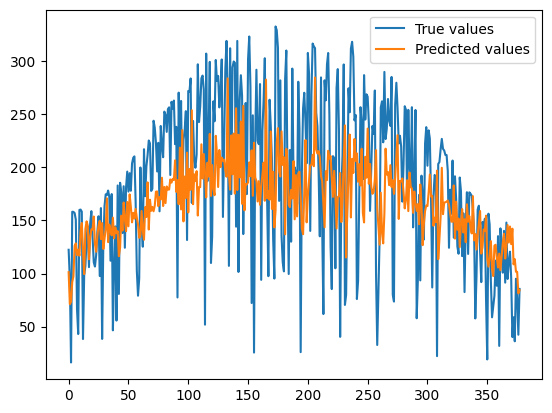

In [760]:
# assume y_true is a numpy array of true values and y_pred is a numpy array of predicted values
plt.plot(y_test_reshaped, label='True values')
plt.plot(y_pred_reshaped, label='Predicted values')
plt.legend()
plt.show()

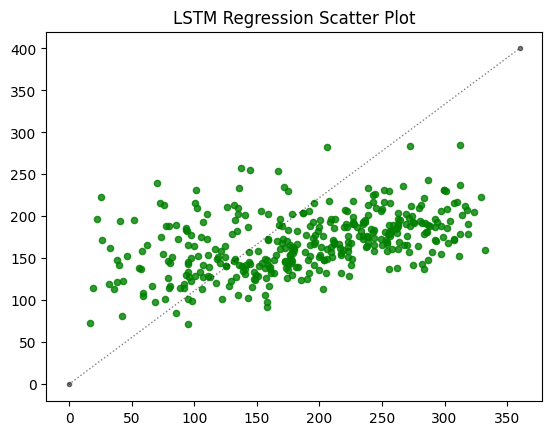

In [761]:
### validation scatter plot(RandomForest) ###
x1 = [-0.5, 360]
y1 = [-0.5, 400] 

plt.figure()
plt.plot(x1, y1, c='0', linewidth=1, linestyle=':', marker='.', alpha=0.5)
plt.scatter(y_test_reshaped, y_pred_reshaped, s=20, c='g',  marker = 'o', alpha=0.8 )
plt.title('LSTM Regression Scatter Plot')
plt.show()

<br/>

<br/>

<br/>

## Prophet for region data (contain weather data)

In [336]:
import pandas as pd
from prophet import Prophet
print(region_test_data.head())

            ds        y  temp  humidity  wind_speed  pressure  day_of_year
709 2012-06-09  151.862  52.7      67.6         6.9      30.3          161
710 2012-06-10   44.392  53.6      88.1         9.1      30.2          162
711 2012-06-11    6.778  56.6      87.5        15.6      30.1          163
712 2012-06-12   88.353  58.9      82.4        16.4      30.1          164
713 2012-06-13   67.363  56.8      90.5        10.9      30.1          165


In [337]:
train_data = region_train_data[['ds','y', 'temp', 'humidity', 'wind_speed', 'pressure']]
print(train_data)

            ds        y  temp  humidity  wind_speed  pressure
0   2010-07-01  144.584  51.5      59.6         8.6      30.2
1   2010-07-02   41.273  51.3      65.6         9.5      30.2
2   2010-07-03  162.605  52.3      62.0        15.8      30.3
3   2010-07-04  146.571  54.4      67.4        11.5      30.3
4   2010-07-05   39.345  52.3      83.5         7.2      30.2
..         ...      ...   ...       ...         ...       ...
704 2012-06-04  133.585  58.9      68.8        11.9      29.6
705 2012-06-05  107.653  55.3      64.0        23.9      29.6
706 2012-06-06   81.691  55.7      78.3        26.1      30.0
707 2012-06-07  148.201  53.6      70.3        12.2      30.2
708 2012-06-08  154.745  51.8      66.3         7.4      30.2

[709 rows x 6 columns]


In [503]:
# Initialize the model
model = Prophet(changepoint_prior_scale=0.005, interval_width=0.5,growth='linear',changepoint_range=0.9)

# Add additional regressors
model.add_regressor('temp')
model.add_regressor('humidity')
model.add_regressor('wind_speed')
model.add_regressor('pressure')

In [504]:
model.fit(train_data)
test_data = region_test_data[['ds', 'temp', 'humidity', 'wind_speed', 'pressure']]

15:27:45 - cmdstanpy - INFO - Chain [1] start processing
15:27:45 - cmdstanpy - INFO - Chain [1] done processing


In [505]:
forecast = model.predict(test_data)

In [506]:
# Evaluate the performance of the model
y_true = region_test_data['y']
y_pred = forecast['yhat']

In [507]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 43.90162923734149
Mean Squared Error: 3049.7314132568827
R-squared: 0.4734852786574635


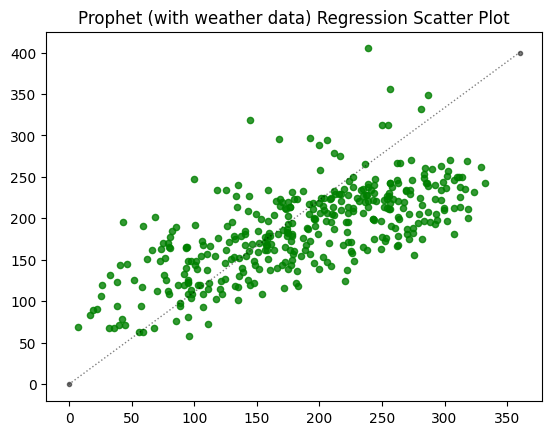

In [508]:
x1 = [-0.5, 360]
y1 = [-0.5, 400] 

plt.figure()
plt.plot(x1, y1, c='0', linewidth=1, linestyle=':', marker='.', alpha=0.5)
plt.scatter(y_true, y_pred, s=20, c='g',  marker = 'o', alpha=0.8 )
plt.title('Prophet (with weather data) Regression Scatter Plot')
plt.show()

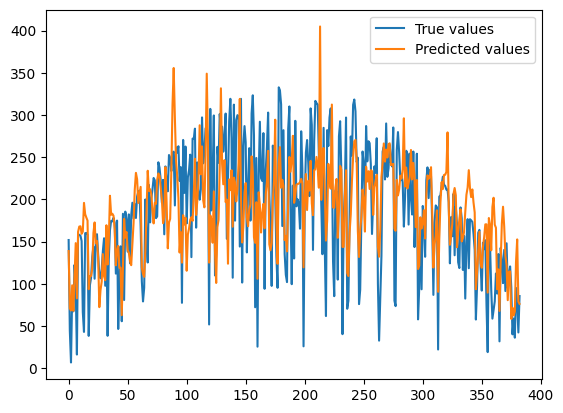

In [535]:
# assume y_true is a numpy array of true values and y_pred is a numpy array of predicted values
X_y_pred_reshaped = y_pred.tolist()
X_y_test_reshaped = y_true.tolist()
X_y_pred_reshaped_np = np.array(X_y_pred_reshaped)
X_y_test_reshaped_np = np.array(X_y_test_reshaped)

plt.plot(X_y_test_reshaped_np, label='True values')
plt.plot(X_y_pred_reshaped_np, label='Predicted values')
plt.legend()
plt.show()

In [509]:


mae = mean_absolute_error(y_true, y_pred)
rProphet = r2_score(X_y_test_reshaped, X_y_pred_reshaped)
ResidualSquare = (X_y_pred_reshaped_np - X_y_test_reshaped_np) ** 2
RSSProphet = sum(ResidualSquare)
MSEProphet = np.mean(ResidualSquare)
num_regress = len(y_pred)


print(f'n = {num_regress}')
print(f'Mean squared error = {MSEProphet}')
print(f'Residual Sum of Squares  = {RSSProphet}')
print(f'R^2 = {rProphet}')

n = 383
Mean squared error = 3049.7314132568827
Residual Sum of Squares  = 1168047.1312773866
R^2 = 0.4734852786574635


### Change the parameter (increase changepoint_prior_scale)

In [726]:
# Initialize the model
model = Prophet(changepoint_prior_scale=0.01, interval_width=0.5,growth='linear',changepoint_range=0.9)

# Add additional regressors
model.add_regressor('temp')
model.add_regressor('humidity')
model.add_regressor('wind_speed')
model.add_regressor('pressure')

In [727]:
model.fit(train_data)
test_data = region_test_data[['ds', 'temp', 'humidity', 'wind_speed', 'pressure']]

22:27:32 - cmdstanpy - INFO - Chain [1] start processing
22:27:33 - cmdstanpy - INFO - Chain [1] done processing


In [728]:
forecast = model.predict(test_data)

In [729]:
# Evaluate the performance of the model
y_true = region_test_data['y']
y_pred = forecast['yhat']

In [730]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 44.313631189673586
Mean Squared Error: 3112.1624999189107
R-squared: 0.46270698977140523


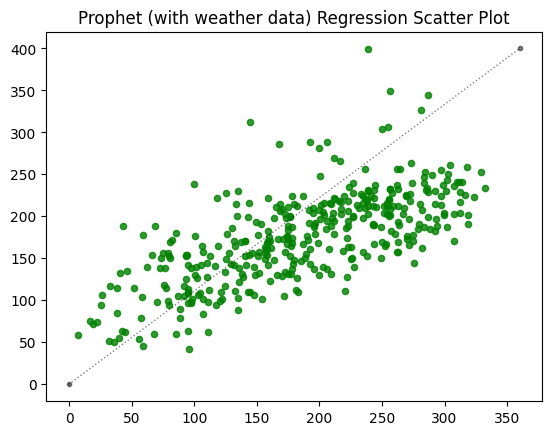

In [731]:
x1 = [-0.5, 360]
y1 = [-0.5, 400] 

plt.figure()
plt.plot(x1, y1, c='0', linewidth=1, linestyle=':', marker='.', alpha=0.5)
plt.scatter(y_true, y_pred, s=20, c='g',  marker = 'o', alpha=0.8 )
plt.title('Prophet (with weather data) Regression Scatter Plot')
plt.show()

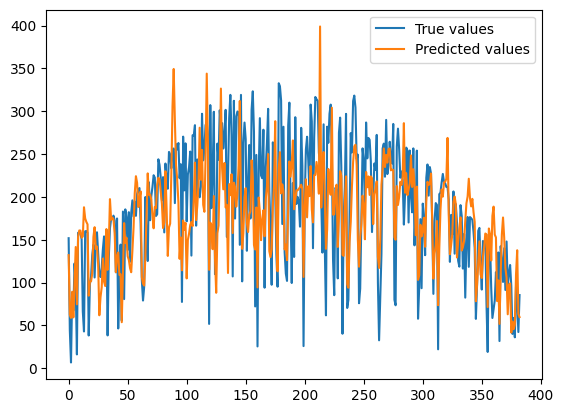

In [732]:
# assume y_true is a numpy array of true values and y_pred is a numpy array of predicted values
X_y_pred_reshaped = y_pred.tolist()
X_y_test_reshaped = y_true.tolist()
X_y_pred_reshaped_np = np.array(X_y_pred_reshaped)
X_y_test_reshaped_np = np.array(X_y_test_reshaped)

plt.plot(X_y_test_reshaped_np, label='True values')
plt.plot(X_y_pred_reshaped_np, label='Predicted values')
plt.legend()
plt.show()

### Change the parameter (decrease changepoint_prior_scale)

In [737]:
# Initialize the model
model = Prophet(changepoint_prior_scale=0.001, interval_width=0.5,growth='linear',changepoint_range=0.9)

# Add additional regressors
model.add_regressor('temp')
model.add_regressor('humidity')
model.add_regressor('wind_speed')
model.add_regressor('pressure')

In [738]:
model.fit(train_data)
test_data = region_test_data[['ds', 'temp', 'humidity', 'wind_speed', 'pressure']]

22:29:24 - cmdstanpy - INFO - Chain [1] start processing
22:29:24 - cmdstanpy - INFO - Chain [1] done processing


In [739]:
forecast = model.predict(test_data)

In [740]:
# Evaluate the performance of the model
y_true = region_test_data['y']
y_pred = forecast['yhat']

In [741]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 45.03013212115993
Mean Squared Error: 3187.469191736814
R-squared: 0.4497058180336657


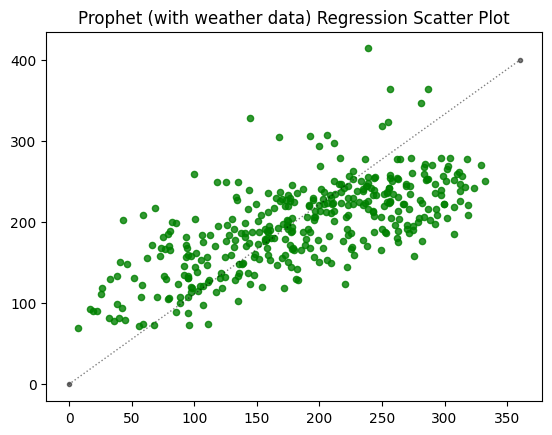

In [742]:
x1 = [-0.5, 360]
y1 = [-0.5, 400] 

plt.figure()
plt.plot(x1, y1, c='0', linewidth=1, linestyle=':', marker='.', alpha=0.5)
plt.scatter(y_true, y_pred, s=20, c='g',  marker = 'o', alpha=0.8 )
plt.title('Prophet (with weather data) Regression Scatter Plot')
plt.show()

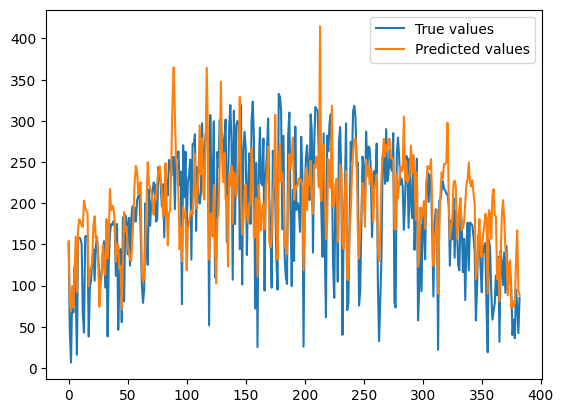

In [743]:
# assume y_true is a numpy array of true values and y_pred is a numpy array of predicted values
X_y_pred_reshaped = y_pred.tolist()
X_y_test_reshaped = y_true.tolist()
X_y_pred_reshaped_np = np.array(X_y_pred_reshaped)
X_y_test_reshaped_np = np.array(X_y_test_reshaped)

plt.plot(X_y_test_reshaped_np, label='True values')
plt.plot(X_y_pred_reshaped_np, label='Predicted values')
plt.legend()
plt.show()

<br/>

<br/>

<br/>

## LSTM Model - for region data (add weather data)

Input shape: (5, 4) 5 days ahead, 'temp,humidity,wind_speed,precepitaion'
Target shape: (1) energy production

In [512]:
print(region_train_data.shape[0])

print(region_train_data.head())

print(region_test_data.shape[0])

print(region_test_data.head())

709
          ds        y  temp  humidity  wind_speed  pressure  day_of_year
0 2010-07-01  144.584  51.5      59.6         8.6      30.2          182
1 2010-07-02   41.273  51.3      65.6         9.5      30.2          183
2 2010-07-03  162.605  52.3      62.0        15.8      30.3          184
3 2010-07-04  146.571  54.4      67.4        11.5      30.3          185
4 2010-07-05   39.345  52.3      83.5         7.2      30.2          186
383
            ds        y  temp  humidity  wind_speed  pressure  day_of_year
709 2012-06-09  151.862  52.7      67.6         6.9      30.3          161
710 2012-06-10   44.392  53.6      88.1         9.1      30.2          162
711 2012-06-11    6.778  56.6      87.5        15.6      30.1          163
712 2012-06-12   88.353  58.9      82.4        16.4      30.1          164
713 2012-06-13   67.363  56.8      90.5        10.9      30.1          165


In [513]:
# Scale input features

scaler = MinMaxScaler()
input_features = [ 'temp', 'humidity', 'wind_speed', 'pressure']

In [514]:
W_X_train = scaler.fit_transform(region_train_data[input_features])
W_X_test = scaler.transform(region_test_data[input_features])

In [515]:
W_y_train = region_train_data['y'].values
W_y_test = region_test_data['y'].values

In [516]:
print(W_X_train)
print(W_X_test)

print(W_y_train)
print(W_y_test)

[[0.02262443 0.42995169 0.12601626 0.71428571]
 [0.01809955 0.52657005 0.16260163 0.71428571]
 [0.04072398 0.46859903 0.41869919 0.78571429]
 ...
 [0.11764706 0.7310789  0.83739837 0.57142857]
 [0.07013575 0.60225443 0.27235772 0.71428571]
 [0.02941176 0.53784219 0.07723577 0.71428571]]
[[0.04977376 0.55877617 0.05691057 0.78571429]
 [0.07013575 0.88888889 0.14634146 0.71428571]
 [0.13800905 0.87922705 0.41056911 0.64285714]
 ...
 [0.23755656 0.62801932 0.19105691 0.64285714]
 [0.15837104 0.9468599  0.09349593 0.71428571]
 [0.12217195 0.92109501 0.18292683 0.71428571]]
[144.584  41.273 162.605 146.571  39.345 103.003  43.578  64.922  83.996
  94.362  64.071  56.886  41.263 167.798 172.372 161.416 171.065 173.406
  93.181 153.486  83.321 104.956 123.669  93.685 109.954 112.946 105.192
  15.207  44.105 107.473 131.274 193.378 132.131 117.984 187.431 171.174
 185.63  180.951 195.225 197.182  27.521 158.429 159.037 196.146 214.156
 158.199 219.993 219.247 171.286 206.479 228.674 225.904 21

In [517]:
#create a function to reshape the data into a format suitable for the LSTM model:

def reshape_data(x_data, y_data, lookback):
    X, Y = [], []
    for i in range(len(y_data) - lookback):
        X.append(x_data[i:(i + lookback)])
        Y.append(y_data[i + lookback])
    return np.array(X), np.array(Y)

In [520]:
lookback = 5
# The number of previous time steps to use as input features

W_X_train_reshaped, W_y_train_reshaped = reshape_data(W_X_train, W_y_train, lookback)
W_X_test_reshaped, W_y_test_reshaped = reshape_data(W_X_test, W_y_test, lookback)

print(W_X_train_reshaped.shape[1])
print(W_X_train_reshaped.shape[2])
print(W_y_train_reshaped)

5
4
[103.003  43.578  64.922  83.996  94.362  64.071  56.886  41.263 167.798
 172.372 161.416 171.065 173.406  93.181 153.486  83.321 104.956 123.669
  93.685 109.954 112.946 105.192  15.207  44.105 107.473 131.274 193.378
 132.131 117.984 187.431 171.174 185.63  180.951 195.225 197.182  27.521
 158.429 159.037 196.146 214.156 158.199 219.993 219.247 171.286 206.479
 228.674 225.904 217.92   78.197 222.297 229.832 180.149 212.427 236.232
 204.633 157.177 217.449 117.981  50.903  65.877  44.672 247.282 212.593
 198.208 236.731 105.568 156.369 245.469 217.852 188.629  52.605 189.438
 223.256 256.565 260.466 143.096 180.298 248.996 223.205 137.716 262.886
 225.553 261.516 182.293 272.817 223.527 273.461 112.907  97.415 122.081
 172.993 199.444 178.503 124.304 208.38   74.704 229.508 195.692 197.93
 176.016 244.137  75.816 274.139 287.831 295.988  72.527 262.222 285.986
 264.623 196.961  37.7   128.089 267.194 217.6   186.875 124.46  274.84
 174.24   58.049 136.344 268.672 120.727 139.103 

In [521]:
#build the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape= (input_shape.shape[1],input_shape.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer=optimizer, loss='mse')
    return model

model = create_lstm_model(W_X_train_reshaped)

In [527]:
# Train the model
model.fit(W_X_train_reshaped, W_y_train_reshaped, epochs=50, batch_size=64, validation_split=0.2)

# Evaluate the model
model.evaluate(W_X_test_reshaped, W_y_test_reshaped)

Epoch 1/50
9/9 [==============================] - 0s 15ms/step - loss: 5463.3794 - val_loss: 4011.2539
Epoch 2/50
9/9 [==============================] - 0s 10ms/step - loss: 5651.3398 - val_loss: 3936.8044
Epoch 3/50
9/9 [==============================] - 0s 8ms/step - loss: 6085.1592 - val_loss: 4338.3359
Epoch 4/50
9/9 [==============================] - 0s 9ms/step - loss: 5612.4712 - val_loss: 4013.9207
Epoch 5/50
9/9 [==============================] - 0s 8ms/step - loss: 5997.6567 - val_loss: 4123.1519
Epoch 6/50
9/9 [==============================] - 0s 9ms/step - loss: 5304.3145 - val_loss: 4333.6777
Epoch 7/50
9/9 [==============================] - 0s 10ms/step - loss: 5470.4878 - val_loss: 4327.1826
Epoch 8/50
9/9 [==============================] - 0s 11ms/step - loss: 5450.3267 - val_loss: 4147.0996
Epoch 9/50
9/9 [==============================] - 0s 9ms/step - loss: 5538.8066 - val_loss: 4280.0747
Epoch 10/50
9/9 [==============================] - 0s 9ms/step - loss: 5469.72

4942.56689453125

In [528]:
W_y_pred = model.predict(W_X_test_reshaped)
W_y_pred_reshaped = np.squeeze(W_y_pred)
print(len(W_y_pred_reshaped))
print(len(W_y_test_reshaped))

12/12 [==============================] - 0s 3ms/step
378
378


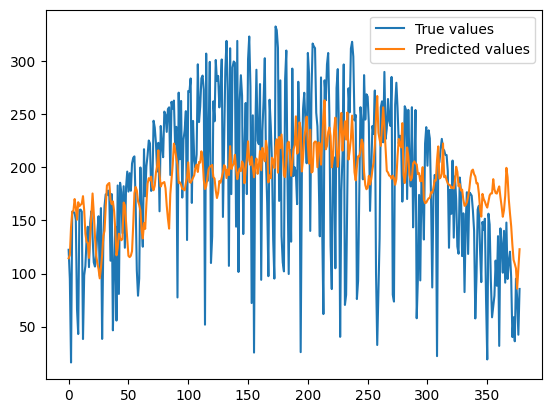

In [529]:
# assume y_true is a numpy array of true values and y_pred is a numpy array of predicted values
plt.plot(W_y_test_reshaped, label='True values')
plt.plot(W_y_pred_reshaped, label='Predicted values')
plt.legend()
plt.show()

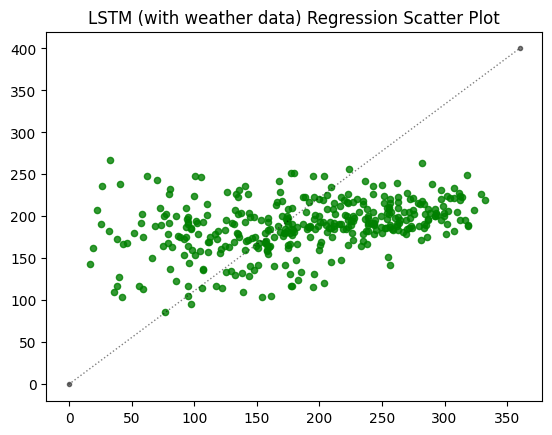

In [530]:
### validation scatter plot(RandomForest) ###
x1 = [-0.5, 360]
y1 = [-0.5, 400] 

plt.figure()
plt.plot(x1, y1, c='0', linewidth=1, linestyle=':', marker='.', alpha=0.5)
plt.scatter(W_y_test_reshaped, W_y_pred_reshaped, s=20, c='g',  marker = 'o', alpha=0.8 )
plt.title('LSTM (with weather data) Regression Scatter Plot')
plt.show()

In [531]:
mae = mean_absolute_error(W_y_test_reshaped, W_y_pred_reshaped)
rLSTM_Weather = r2_score(W_y_test_reshaped, W_y_pred_reshaped)
ResidualSquare = (W_y_pred_reshaped - W_y_test_reshaped) **2
RSSLSTM_Weather = sum(ResidualSquare)
MSELSTM_Weather = np.mean(ResidualSquare)
num_regress = len(W_y_pred_reshaped)


print(f'n = {num_regress}')
print(f'Mean squared error = {MSELSTM_Weather}')
print(f'Residual Sum of Squares  = {RSSLSTM_Weather}')
print(f'R^2 = {rLSTM_Weather}')

n = 378
Mean squared error = 4942.566907841729
Residual Sum of Squares  = 1868290.291164175
R^2 = 0.1272737595227964


<br/>

<br/>

<br/>

## XGBooster Model

In [66]:
pip install xgboost

  Using cached xgboost-1.7.5-py3-none-win_amd64.whl (70.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [83]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import r2_score
print(X_region_data)
print(X_region_data.columns)

             ds        y  temp  humidity  wind_speed  pressure
0    2010-07-01  144.584  51.5      59.6         8.6      30.2
1    2010-07-02   41.273  51.3      65.6         9.5      30.2
2    2010-07-03  162.605  52.3      62.0        15.8      30.3
3    2010-07-04  146.571  54.4      67.4        11.5      30.3
4    2010-07-05   39.345  52.3      83.5         7.2      30.2
...         ...      ...   ...       ...         ...       ...
1087 2013-06-25   36.157  55.4      89.2        10.7      30.0
1088 2013-06-26   95.085  61.9      75.8        20.3      30.1
1089 2013-06-27   76.850  61.0      71.9        10.2      30.1
1090 2013-06-28   42.329  57.5      91.7         7.8      30.2
1091 2013-06-30   85.452  55.9      90.1        10.0      30.2

[1092 rows x 6 columns]
Index(['ds', 'y', 'temp', 'humidity', 'wind_speed', 'pressure'], dtype='object')


In [84]:
#### Processing to obtain X and Y ###

X_region_data['day_of_year'] = X_region_data['ds'].apply(lambda x: x.dayofyear)


all_data = X_region_data.drop(['y','ds'],axis=1).values #X value:  temp, humidity, wind_speed, pressure, ds
all_label = X_region_data['y'].values #Y value: Solar Energy Production


print(all_data)
print(all_label)

[[ 51.5  59.6   8.6  30.2 182. ]
 [ 51.3  65.6   9.5  30.2 183. ]
 [ 52.3  62.   15.8  30.3 184. ]
 ...
 [ 61.   71.9  10.2  30.1 178. ]
 [ 57.5  91.7   7.8  30.2 179. ]
 [ 55.9  90.1  10.   30.2 181. ]]
[144.584  41.273 162.605 ...  76.85   42.329  85.452]


C:\Users\zanex\AppData\Local\Temp\ipykernel_14212\4170680748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_region_data['day_of_year'] = X_region_data['ds'].apply(lambda x: x.dayofyear)


In [173]:
### Dividing training set and testing set randomly ### 
X_train0, X_test0, Y_train0, Y_test0 = train_test_split(all_data, all_label,test_size=0.2, random_state=393 )

C:\Users\zanex\AppData\Local\Temp\ipykernel_14212\2967250006.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_train0)
C:\Users\zanex\AppData\Local\Temp\ipykernel_14212\2967250006.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test0)


<Axes: ylabel='Density'>

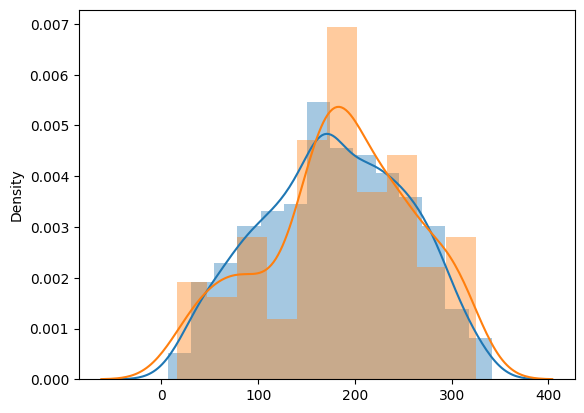

In [174]:
### Display the distribution of training set and testing set ###
sns.distplot(Y_train0)
sns.distplot(Y_test0)

In [175]:
### Shape of training set and testing set ###
print(X_train0.shape)
print(X_test0.shape)


(873, 5)
(219, 5)


In [176]:
### Building XGBRegression Model ###
xgb = XGBRegressor(n_estimators=200, learning_rate=0.09, min_child_weight=4, max_depth=2)
xgb.fit(X_train0,Y_train0) #Model Fitting
predict = xgb.predict(X_test0)

In [177]:
### Calculation R-squared value ### 
rXGBR = r2_score(Y_test0,predict)
print(rXGBR)

0.6702654914762278


In [178]:
ResidualSquareXGB = (predict - Y_test0) **2
RSSXGB = sum(ResidualSquareXGB)
MSEXGB = np.mean(ResidualSquareXGB)

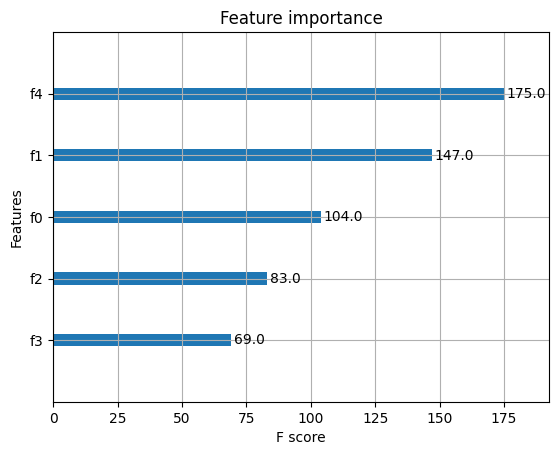

In [179]:
### Feature importance ###
plot_importance(xgb)
plt.show()# f0: temp, f1: humidity, f2: wind_speed,f3: pressure, f4: ds

<function matplotlib.pyplot.show(close=None, block=None)>

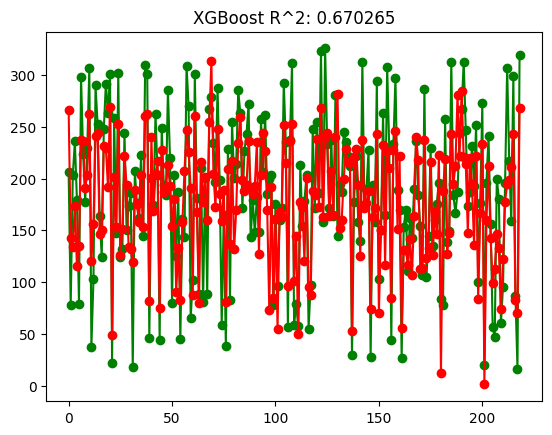

In [180]:
### Validation line chart(XGBR) ###
plt.figure()
plt.plot(np.arange(len(predict)),Y_test0,'go-',label='true value')
plt.plot(np.arange(len(predict)),predict,'ro-',label='predict value')
plt.title('XGBoost R^2: %f' % rXGBR)
plt.legend
plt.show

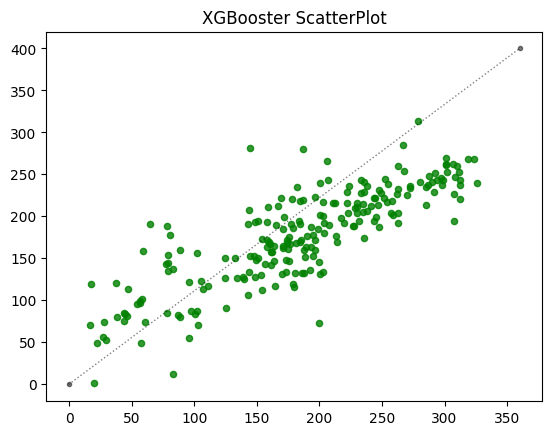

In [181]:
### validation scatter plot(XGBR) ###
x1 = [-0.5, 360]
y1 = [-0.5, 400] 

plt.figure()
plt.plot(x1, y1, c='0', linewidth=1, linestyle=':', marker='.', alpha=0.5)
plt.scatter(Y_test0, predict, s=20, c='g', marker = 'o', alpha=0.8 )
plt.title('XGBooster ScatterPlot')
plt.show()

<br/>

<br/>

<br/>

## Random Forest Model

In [182]:
### Building RandomForest Model ###
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 700,  random_state=0) #Instantiate the random forest with default parameters
rfr.fit(X_train0,Y_train0.astype('int')) #Model Fitting
results = rfr.predict(X_test0)


In [221]:
### Calculating linear regression parameters ###
rRF = rfr.score(X_test0, Y_test0.astype('int'))
ResidualSquare = (results - Y_test0) **2
RSSRF = sum(ResidualSquare)
MSERF = np.mean(ResidualSquare)
num_regress = len(results)


print(f'n = {num_regress}')
print(f'Mean squared error = {MSERF}')
print(f'Residual Sum of Squares  = {RSSRF}')
print(f'R^2 = {rRF}')

[249.36142857 121.85142857 150.83142857 171.47428571 136.08142857
 123.91142857 231.54142857 241.57714286 193.35857143 211.26428571
 282.65857143  92.02428571 155.99571429 244.84       241.89428571
 153.83428571 158.66714286 205.31       222.65       185.25428571
 282.26857143  52.94       197.99428571 133.81428571 273.89428571
 131.96285714 151.01714286 222.64714286 198.88142857 121.95285714
 135.14571429 131.67857143 191.98       170.06571429 149.29
 246.88428571 137.74714286 267.82428571 282.29142857  89.73285714
 229.3        149.69714286 223.07428571 205.03142857  84.39428571
 223.28571429 195.93714286 191.94714286 225.70857143 180.65714286
 147.95571429 176.75142857 117.92       133.17571429  57.27571429
 159.08285714 237.87857143 253.30714286 233.15857143 192.98285714
  91.07571429 261.76142857 169.83857143  64.19       208.22285714
 173.90857143 168.95571429 131.26       249.92285714 270.64142857
 217.91571429 172.34285714 233.07285714 174.19285714 137.47142857
 184.86857143  9

<function matplotlib.pyplot.show(close=None, block=None)>

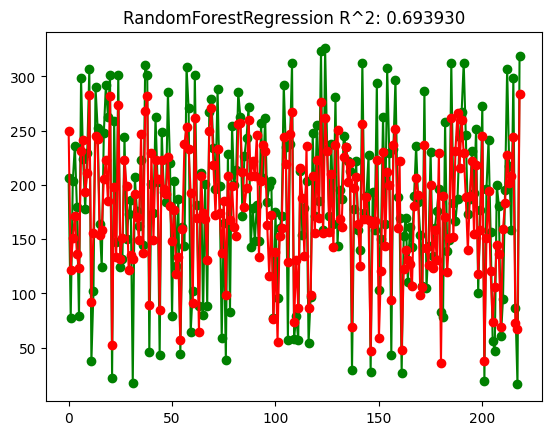

In [184]:
### Validation line chart(RandomForest) ###
plt.figure()
plt.plot(np.arange(len(results)),Y_test0,'go-',label='true value')
plt.plot(np.arange(len(results)),results,'ro-',label='predict value')
plt.title('RandomForestRegression R^2: %f' % rRF)
plt.legend
plt.show

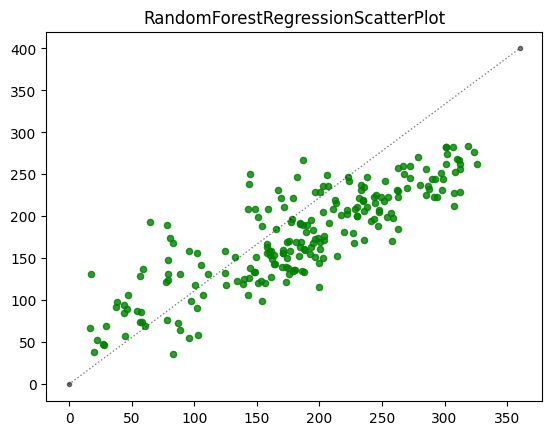

In [185]:
### validation scatter plot(RandomForest) ###
x1 = [-0.5, 360]
y1 = [-0.5, 400] 

plt.figure()
plt.plot(x1, y1, c='0', linewidth=1, linestyle=':', marker='.', alpha=0.5)
plt.scatter(Y_test0, results, s=20, c='g',  marker = 'o', alpha=0.8 )
plt.title('RandomForestRegressionScatterPlot')
plt.show()

### Change the parameter (increase n_estimator)

In [762]:
### Building RandomForest Model ###
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 1000,  random_state=0) #Instantiate the random forest with default parameters
rfr.fit(X_train0,Y_train0.astype('int')) #Model Fitting
results = rfr.predict(X_test0)

In [763]:
### Calculating linear regression parameters ###
rRF = rfr.score(X_test0, Y_test0.astype('int'))
ResidualSquare = (results - Y_test0) **2
RSSRF = sum(ResidualSquare)
MSERF = np.mean(ResidualSquare)
num_regress = len(results)


print(f'n = {num_regress}')
print(f'Mean squared error = {MSERF}')
print(f'Residual Sum of Squares  = {RSSRF}')
print(f'R^2 = {rRF}')

n = 219
Mean squared error = 1806.6151697534247
Residual Sum of Squares  = 395648.72217599995
R^2 = 0.6934415437511203


<function matplotlib.pyplot.show(close=None, block=None)>

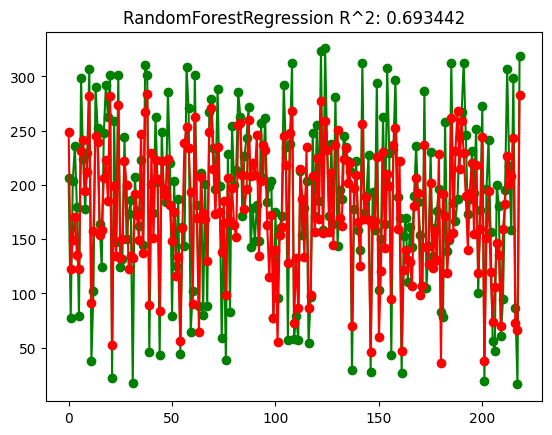

In [764]:
### Validation line chart(RandomForest) ###
plt.figure()
plt.plot(np.arange(len(results)),Y_test0,'go-',label='true value')
plt.plot(np.arange(len(results)),results,'ro-',label='predict value')
plt.title('RandomForestRegression R^2: %f' % rRF)
plt.legend
plt.show

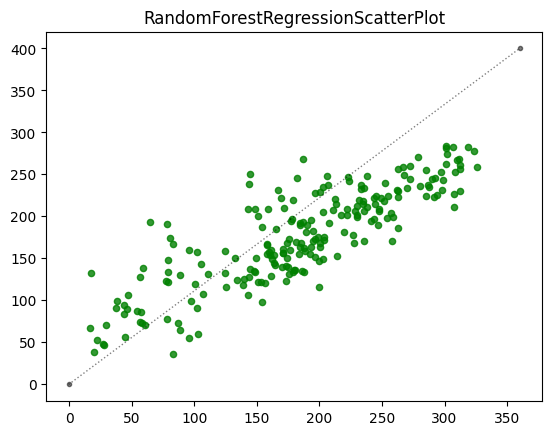

In [765]:
### validation scatter plot(RandomForest) ###
x1 = [-0.5, 360]
y1 = [-0.5, 400] 

plt.figure()
plt.plot(x1, y1, c='0', linewidth=1, linestyle=':', marker='.', alpha=0.5)
plt.scatter(Y_test0, results, s=20, c='g',  marker = 'o', alpha=0.8 )
plt.title('RandomForestRegressionScatterPlot')
plt.show()

### Change the parameter (decrease n_estimator)

In [776]:
### Building RandomForest Model ###
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 600,  random_state=0) #Instantiate the random forest with default parameters
rfr.fit(X_train0,Y_train0.astype('int')) #Model Fitting
results = rfr.predict(X_test0)

In [777]:
### Calculating linear regression parameters ###
rRF = rfr.score(X_test0, Y_test0.astype('int'))
ResidualSquare = (results - Y_test0) **2
RSSRF = sum(ResidualSquare)
MSERF = np.mean(ResidualSquare)
num_regress = len(results)


print(f'n = {num_regress}')
print(f'Mean squared error = {MSERF}')
print(f'Residual Sum of Squares  = {RSSRF}')
print(f'R^2 = {rRF}')

n = 219
Mean squared error = 1805.6270701983765
Residual Sum of Squares  = 395432.32837344427
R^2 = 0.6936292212149522


<function matplotlib.pyplot.show(close=None, block=None)>

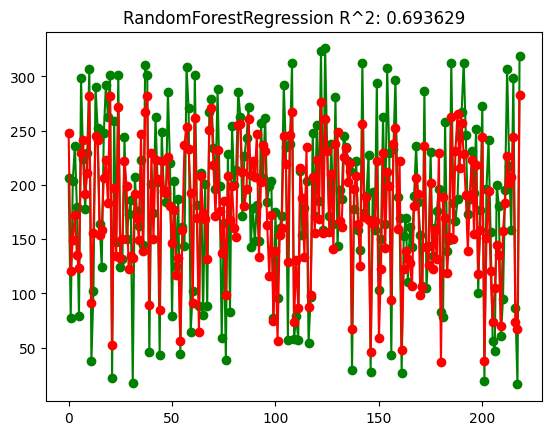

In [778]:
### Validation line chart(RandomForest) ###
plt.figure()
plt.plot(np.arange(len(results)),Y_test0,'go-',label='true value')
plt.plot(np.arange(len(results)),results,'ro-',label='predict value')
plt.title('RandomForestRegression R^2: %f' % rRF)
plt.legend
plt.show

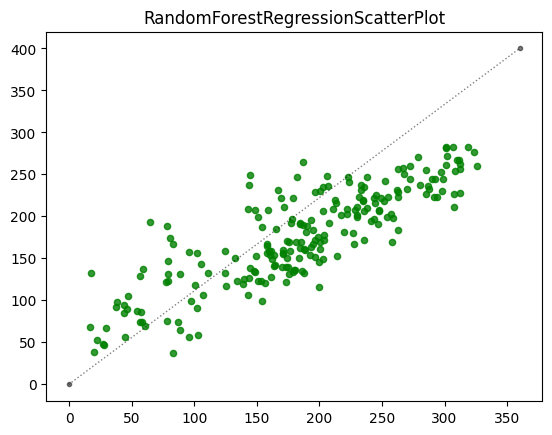

In [779]:
### validation scatter plot(RandomForest) ###
x1 = [-0.5, 360]
y1 = [-0.5, 400] 

plt.figure()
plt.plot(x1, y1, c='0', linewidth=1, linestyle=':', marker='.', alpha=0.5)
plt.scatter(Y_test0, results, s=20, c='g',  marker = 'o', alpha=0.8 )
plt.title('RandomForestRegressionScatterPlot')
plt.show()

<br/>

<br/>

## Neural Network Model

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [188]:
### Building Neural Network Model ###
sc=StandardScaler()
scaler = sc.fit(X_train0)
trainX_scaled = scaler.transform(X_train0)
testX_scaled = scaler.transform(X_test0)

mlp_reg = MLPRegressor(hidden_layer_sizes=(100,70,20,10),
                       max_iter = 2000,activation = 'relu',learning_rate_init= 0.01,
                       solver = 'adam')
mlp_reg.fit(trainX_scaled, Y_train0)
y_pred = mlp_reg.predict(testX_scaled)

In [190]:
ResidualSquareNN = (y_pred - Y_test0) **2
RSSNN = sum(ResidualSquareNN)
MSENN = np.mean(ResidualSquareNN)

<function matplotlib.pyplot.show(close=None, block=None)>

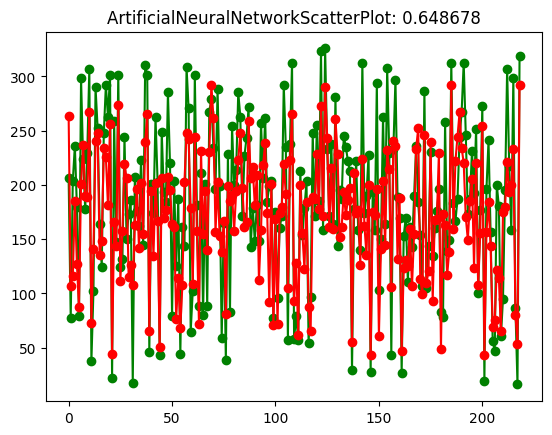

In [191]:
### Validation line chart(Neural Network) ###
rNN = r2_score(Y_test0,y_pred)
plt.figure()
plt.plot(np.arange(len(y_pred)),Y_test0,'go-',label='true value')
plt.plot(np.arange(len(y_pred)),y_pred,'ro-',label='predict value')
plt.title('ArtificialNeuralNetworkScatterPlot: %f' % rNN)
plt.legend
plt.show

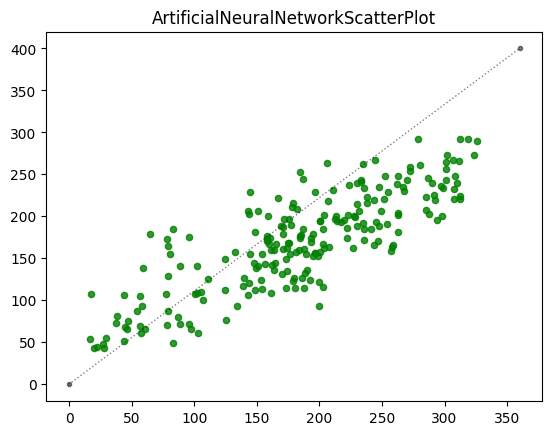

In [192]:
### validation scatter plot(Neural Network) ###
x1 = [-0.5, 360]
y1 = [-0.5, 400] 

plt.figure()
plt.plot(x1, y1, c='0', linewidth=1, linestyle=':', marker='.', alpha=0.5)#绘制虚线
plt.scatter(Y_test0, y_pred, s=20, c='g', marker = 'o', alpha=0.8 )#绘制散点图
plt.title('ArtificialNeuralNetworkScatterPlot')
plt.show()

# Conclusion

In [665]:
data = {'Model':  ['RF','NN','XGBoost','LSTM_without_weather','LSTM_with_weather','Prophet'],
        'RMSE': [MSERF,MSENN,MSEXGB,MSELSTM_NoWeather, MSELSTM_Weather, MSEProphet],
        'Coeff Of Det(R^2)':[rRF,rNN,rXGBR,rLSTM_NoWeather, rLSTM_Weather, rProphet],
        'RSS':[RSSRF,RSSNN,RSSXGB,RSSLSTM_NoWeather, RSSLSTM_Weather, RSSProphet]
        }

df = pd.DataFrame (data, columns = ['Model','RMSE','RSS','Coeff Of Det(R^2)'])
df_transposed = df.T
df_transposed


,0,1,2,3,4,5
Model,RF,NN,XGBoost,LSTM_without_weather,LSTM_with_weather,Prophet
RMSE,1803.694855,2061.462454,1934.791585,4504.647965,4942.566908,3049.731413
RSS,395009.173242,451460.277435,423719.357173,1702756.930849,1868290.291164,1168047.131277
Coeff Of Det(R^2),0.69393,0.648678,0.670265,0.204599,0.127274,0.473485


In [666]:
df

,Model,RMSE,RSS,Coeff Of Det(R^2)
0,RF,1803.694855,3.950092e+05,0.693930
1,NN,2061.462454,4.514603e+05,0.648678
2,XGBoost,1934.791585,4.237194e+05,0.670265
3,LSTM_without_weather,4504.647965,1.702757e+06,0.204599
4,LSTM_with_weather,4942.566908,1.868290e+06,0.127274
5,Prophet,3049.731413,1.168047e+06,0.473485
